<a href="https://colab.research.google.com/github/nicolenahyun/Section1_project/blob/main/n233-feature-importances/n233a-feature-importances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 3*

# 📝 Assignment
---
# Feature Importances

### 1) 지속적으로 포트폴리오 프로젝트를 수행하세요
- 지속적으로 데이터를 랭글링 하고 추가적인 시각화 결과를 만드세요
- 작성한 코드마다 적절한 코멘트를 추가하세요
- 모델을 학습시키고 베이스라인 모델과 비교해 보세요
- **포트폴리오 프로젝트의 베이스라인 모델이 무엇인지 한 문장으로 설명하여 과제 제출폼에 제출하세요.** 

In [2]:
# Setup

# common:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import folium

# for ML:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# set some display options:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", 36)

In [22]:
!pip install -U pandas-profiling
!pip install category_encoders

     |████████████████████████████████| 248 kB 4.2 MB/s 
     |████████████████████████████████| 675 kB 46.4 MB/s 
     |████████████████████████████████| 102 kB 57.0 MB/s 
     |████████████████████████████████| 62 kB 661 kB/s 
     |████████████████████████████████| 3.1 MB 31.1 MB/s 
     |████████████████████████████████| 10.1 MB 44.1 MB/s 
     |████████████████████████████████| 636 kB 56.6 MB/s 
     |████████████████████████████████| 812 kB 46.8 MB/s 
     |████████████████████████████████| 28.5 MB 43 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=8ab40b222a509ab2408ccd6f05c90921b20cbe6e56506954fd33a0a3912ca541
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=ead37c0cb395162a97dc88ac7c6ffa01783292388e6d06b5c6cafd2462cb1a5b
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e

In [3]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (1).csv


In [4]:
import io
df = pd.read_csv(io.StringIO(uploaded['hotel_bookings.csv'].decode('utf-8', 'ignore')))

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## column 설명

hotel

is_canceled

lead_time

arrival_date_year

arrival_date_month

arrival_date_week_number

arrival_date_day_of_month

stays_in_weekend_nights

stays_in_week_nights

adults

children

babies

meal

country

market_segment

distribution_channel

is_repeated_guest

previous_cancellations

previous_bookings_not_canceled

reserved_room_type

assigned_room_type

booking_changes

deposit_type

agent

company

days_in_waiting_list

customer_type

adr

required_car_parking_spaces

total_of_special_requests

reservation_status

reservation_status_date

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
# hotel의 범주 비율을 살펴보자
df['hotel'].value_counts(normalize=True)

City Hotel      0.664461
Resort Hotel    0.335539
Name: hotel, dtype: float64

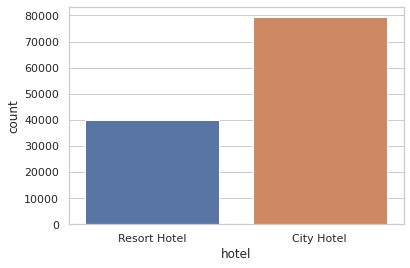

In [8]:
# Seaborn countplot
sns.countplot(x=df['hotel'])

In [9]:
# 결측치 확인하기
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [11]:
# 결측치 대체하기
# agent : agent가 없는 경우, 예약이 agent를 통해 이뤄지지 X
# company : company가 없는 경우, private 호텔일 것임

nan_replacements = {"children:": 0.0, 
                    "country:": "Unknown",
                    "agent": 0,
                    "company": 0}
df_cln = df.fillna(nan_replacements)

# "meal" contains values "Undefined", which is equal to SC.
df_cln["meal"].replace("Undefined", "SC", inplace=True)

# Some rows contain entries with 0 adults, 0 children and 0 babies. 
# I'm dropping these entries with no guests.
zero_guests = list(df_cln.loc[df_cln["adults"]
                   + df_cln["children"]
                   + df_cln["babies"]==0].index)
df_cln.drop(df_cln.index[zero_guests], inplace=True)

In [12]:
df_cln.shape

(119210, 32)

### 2) Xgboost를 사용해 학습하고 기존 모델과 비교해 보세요.
- 본인 포트폴리오 데이터를 Xgboost로 학습하여 기존에 만들었던 모델과 비교합니다.
- **breast cancer 데이터를 Xgboost로 학습하고 f1 score를 제출하세요.(test 데이터에서 0.95이상)**

In [ ]:
### (본인 포트폴리오 과제) 이곳에서 과제를 진행해 주세요 ### 

In [1]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer 

cancer_dataset = load_breast_cancer()

features = cancer_dataset.data
target = cancer_dataset.target
df = pd.DataFrame(data=features, columns=cancer_dataset.feature_names)
df['target'] = target

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=2)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [2]:
!pip install category_encoders

     |████████████████████████████████| 80 kB 3.4 MB/s 


In [3]:
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from sklearn.metrics import f1_score
pipe.fit(X_train, y_train)
pred_y = pipe.predict(X_test)

f1_score(y_test, pred_y)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.9635036496350365

### 3) Permutation importances를 계산하고 다른 중요도 결과와 비교해 보세요
- 본인 포트폴리오 데이터를 사용해 만든 모델의 Permutation importances를 계산하세요.
- **breast cancer 데이터를 사용해 만든 모델의 Permutation importances를 계산하고 가장 높은 값을 가지는 특성의 이름을 과제 제출폼에 제출하세요.**
    - eli5 PermutationImportance 사용
    - scoring = 'accuracy'
    - n_iter = 5
    - random_state = 2

In [ ]:
### (본인 포트폴리오 과제) 이곳에서 과제를 진행해 주세요 ### 

In [5]:
!pip install eli5

     |████████████████████████████████| 106 kB 4.3 MB/s 


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용한다
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)) 
])

In [8]:
# pipeline 생성을 확인합니다.
pipe.named_steps

{'preprocessing': Pipeline(memory=None,
          steps=[('ordinalencoder',
                  OrdinalEncoder(cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 mapping=None, return_df=True, verbose=0)),
                 ('simpleimputer',
                  SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                                missing_values=nan, strategy='mean',
                                verbose=0))],
          verbose=False),
 'rf': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
         

In [10]:
pipe.fit(X_train,y_train)
pipe.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.9473684210526315

In [11]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    pipe.named_steps['rf'],
    scoring = 'accuracy',
    n_iter = 5,
    random_state=2
)

X_test_transform = pipe.named_steps['preprocessing'].transform(X_test)
permuter.fit(X_test_transform,y_test)

PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [12]:
pd.Series(permuter.feature_importances_,cancer_dataset.feature_names).sort_values()

worst area                -4.440892e-17
mean radius                0.000000e+00
worst compactness          0.000000e+00
worst perimeter            0.000000e+00
fractal dimension error    0.000000e+00
symmetry error             0.000000e+00
concave points error       0.000000e+00
compactness error          0.000000e+00
perimeter error            0.000000e+00
texture error              0.000000e+00
smoothness error           0.000000e+00
mean fractal dimension     0.000000e+00
mean texture               0.000000e+00
mean perimeter             0.000000e+00
radius error               0.000000e+00
mean smoothness            0.000000e+00
mean compactness           0.000000e+00
worst fractal dimension    0.000000e+00
mean symmetry              0.000000e+00
mean area                  1.754386e-03
area error                 1.754386e-03
worst smoothness           1.754386e-03
worst radius               3.508772e-03
worst concavity            5.263158e-03
concavity error            5.263158e-03


In [13]:
eli5.show_weights(
    permuter, 
    top=1,
    feature_names=cancer_dataset.feature_names
)

## 🔥 도전과제

### 4) Xgboost 외에 다른 부스팅 라이브러리로 모델을 학습시켜 Xgboost와 비교해 보세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 